# Word2Vec Visualization

## 1. Load the embeddings

In [5]:
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(r'C:\Users\dell\Documents\Python\word2vec\glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

filename = 'glove2word2vec_model.sav'
pickle.dump(model, open(filename, 'wb'))

C:\Users\dell\AppData\Local\Temp/ipykernel_18072/2145406745.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


## 2. Get similar words

In [52]:
import pickle
import pandas as pd

filename = 'glove2word2vec_model.sav'
model = pickle.load(open(filename, 'rb'))

word1, word2 = "school", "cat"
closest1, closest2 = model.most_similar(word1), model.most_similar(word2)
closest_words1, closest_words2 = [closest1[i][0] for i in range(len(closest1))], [closest2[i][0] for i in range(len(closest2))]

print(f'Words close to {word1}:')
print(closest_words1)

print(f'Words close to {word2}:')
print(closest_words2)

Words close to school:
['college', 'schools', 'elementary', 'students', 'student', 'campus', 'graduate', 'university', 'teacher', 'high']
Words close to cat:
['dog', 'rabbit', 'cats', 'monkey', 'pet', 'dogs', 'mouse', 'puppy', 'rat', 'spider']


<AxesSubplot:>

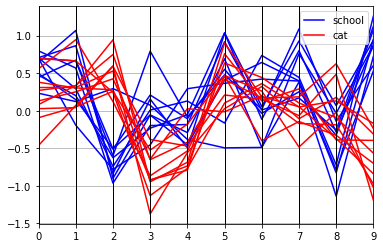

In [53]:
from pandas.plotting import parallel_coordinates

n_dim = 10

closest_words_array1, closest_words_array2 = model[closest_words1][:, :n_dim], model[closest_words2][:, :n_dim]

data1, data2 = pd.DataFrame(closest_words_array1), pd.DataFrame(closest_words_array2)
#data1['word'], data2['word'] = closest_words1, closest_words2
data1['close_to'], data2['close_to'] = word1, word2

data = pd.concat([data1, data2])
parallel_coordinates(data, 'close_to', color=['blue', 'red'])

## 3. Visualize in 2D

In [98]:
import numpy as np
from sklearn.decomposition import PCA
import random
import plotly.express as px

# train PCA on a sample of words
train_words = random.sample(model.key_to_index.keys(), 400_000)
X_train = model[train_words]
pca = PCA(n_components=2).fit(X_train)

C:\Users\dell\AppData\Local\Temp/ipykernel_18072/809266861.py:7: DeprecationWarning:

Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.



In [105]:
# compute the reduction for a few words
words = ['school', 'cat', 'ball', 'freedom']
n_neigh = 10

close_to = {w: [w] for w in words}

word_vectors = model[words]
words_2d = pca.transform(word_vectors)

# transform to dataframe
data = pd.DataFrame({'x': words_2d[:,0], 'y': words_2d[:,1], 'words': words, 'close_to': words})

# add closest
for word in words:
    closest = [model.most_similar(word, topn=n_neigh)[i][0] for i in range(len(model.most_similar(word, topn=n_neigh)))]
    closest_vectors = model[closest]
    closest_2d = pca.transform(closest_vectors)
    new_data = pd.DataFrame({'x': closest_2d[:,0], 'y': closest_2d[:,1], 'words': closest, 'close_to': word})
    data = pd.concat([data, new_data])

# plot them
fig = px.scatter(data, x='x', y='y', color='close_to', hover_data=['words'])
fig.show()